In [18]:
import numpy as np
import MDAnalysis
import matplotlib.pyplot as plt

## Analyzing one pdb

In [19]:
u = MDAnalysis.Universe('files/alanine-dipeptide.pdb')
u

/home/shaunak/work/software/miniconda3/envs/MDAnalysis_Tut/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


<Universe with 22 atoms>

* MDAnalysis creates a `Universe object` for the configuration that you load
* From this universe object, we can access a ton of information about the system

In [20]:
print("No of atoms : ", u.atoms.n_atoms)
print("No of residues : ", u.residues.n_residues)
print()
print("List of residues : ")
for residue in u.residues:
    print(residue.resname)
print()
print("List of atoms : [Name in PDB], [Atom symbol], [Atom id]")
for atom in u.atoms:
    print("{}, {}, {}".format(atom.name, atom.type, atom.id))

No of atoms :  22
No of residues :  3

List of residues : 
ACE
ALA
NME

List of atoms : [Name in PDB], [Atom symbol], [Atom id]
1HH3, H, 1
CH3, C, 2
2HH3, H, 3
3HH3, H, 4
C, C, 5
O, O, 6
N, N, 7
H, H, 8
CA, C, 9
HA, H, 10
CB, C, 11
1HB, H, 12
2HB, H, 13
3HB, H, 14
C, C, 15
O, O, 16
N, N, 17
H, H, 18
CH3, C, 19
1HH3, H, 20
2HH3, H, 21
3HH3, H, 22


### More attributes can be found in the [docs](https://docs.mdanalysis.org/1.0.0/documentation_pages/core/universe.html)

* We will calculate phi ($\phi$) and psi ($\psi$) for this pdb.
* More information about phi and psi can be found [here](https://mattermodeling.stackexchange.com/questions/2170/dihedral-angles-of-alanine-dipeptide).
* $\phi$ is the dihedral angle from carbonyl carbon $C_{i-1}$, to nitrogen ($N_i$), to C-alpha ($C_{\alpha})_i$ and to the next carbonyl carbon $C_i$.
* Below is the visualization that was done in VMD, to visualize the $\phi$ dihedral angle.
![phi](./images/phi.png)


* The atom indices for these (0-indexed) are 4, 6, 8, 14
* We can select these atoms in python using the `select_atoms` function of the universe.

In [21]:
phi = u.select_atoms('index 4 or index 6 or index 8 or index 14')
for atom in phi:
    print(atom.name, atom.resname)

C ACE
N ALA
CA ALA
C ALA


* We can do the same for $\psi$
* $\psi$ is the dihedral from nitrogen (the same from the definition of $\phi$) $N_i$, to the alpha carbon $(C_{\alpha})_i$, to the carbonyl carbon $C_i$, to the next nitrogen $N_{i+1}$.
![psi](./images/psi.png)

* The atom indices for these are 6, 8, 14, 16.

In [22]:
psi = u.select_atoms('index 6 or index 8 or index 14 or index 16')
for atom in psi:
    print(atom.name, atom.resname)

N ALA
CA ALA
C ALA
N NME


### Okay, now let's get down to actually calculating the dihedral angle

* The dihedral angle is defined as the angle between two planes.
* One plane is formed by atoms (1, 2, 3), and the other plane is formed by atoms (2, 3, 4).

In [23]:
from MDAnalysis.analysis.dihedrals import Dihedral
phi_angle = Dihedral([phi]).run()
psi_angle = Dihedral([psi]).run()

/home/shaunak/work/software/miniconda3/envs/MDAnalysis_Tut/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [24]:
phi_value = phi_angle.angles.flatten()[0]
psi_value = psi_angle.angles.flatten()[0]
print("phi : ", phi_value)
print("psi : ", psi_value)

phi :  180.0
psi :  -180.0


/home/shaunak/work/software/miniconda3/envs/MDAnalysis_Tut/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:337: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


### Dealing with trajectories

* You can load any trajectory, be it the output from NAMD, AMBER, GROMACS, OR LAMMPS.
* Here we will load a trajectory from GROMACS output

In [25]:
u = MDAnalysis.Universe('./files/conf.gro', './files/ala_di.trr')
u.trajectory

<TRRReader ./files/ala_di.trr with 10001 frames of 22 atoms>

#### Traversing the trajectory

* The universe returns information about the first frame when accessed like a universe object
* Just by accessing the index of another frame, we can change the frame

In [26]:
print("Frame 0 ; Position of first atom : ", u.atoms.positions[0])
u.trajectory[1]
print("Frame 1 ; Position of first atom : ", u.atoms.positions[0])
print("Switching back to first frame : ")
_ = u.trajectory[0]

Frame 0 ; Position of first atom :  [ 2.0064120e+00  2.0949879e+00 -1.1733850e-05]
Frame 1 ; Position of first atom :  [2.2025487  2.1253457  0.30689952]
Switching back to first frame : 


* Hence, we can loop through `u.trajectory` without referencing the loop variable `ts`

In [27]:
for i, ts in enumerate(u.trajectory):
    if i > 10:
        break
    print("Frame {} ; position of first atom ".format(i), u.atoms.positions[0])
    

Frame 0 ; position of first atom  [ 2.0064120e+00  2.0949879e+00 -1.1733850e-05]
Frame 1 ; position of first atom  [2.2025487  2.1253457  0.30689952]
Frame 2 ; position of first atom  [2.5536041  2.1555233  0.81952065]
Frame 3 ; position of first atom  [2.6031077 2.2014782 0.8281182]
Frame 4 ; position of first atom  [2.7288246 2.120362  0.8614751]
Frame 5 ; position of first atom  [2.5633433  2.1771584  0.85011864]
Frame 6 ; position of first atom  [2.2974885  2.2386591  0.48562694]
Frame 7 ; position of first atom  [1.9939548  2.1101153  0.09093706]
Frame 8 ; position of first atom  [1.9562923  2.1675396  0.36285323]
Frame 9 ; position of first atom  [2.191678  1.9884723 0.4055063]
Frame 10 ; position of first atom  [2.1759682  2.1768475  0.32742798]


### Calculating dihedrals for the trajectory
* We select the atoms like we did earlier, and then pass the entire object (object contains trajectory information as well). The dihedral function will take care of it.

In [28]:
phi_sel = u.select_atoms('index 4 or index 6 or index 8 or index 14')

phi_t = Dihedral([phi_sel]).run()
phi_traj = phi_t.angles.flatten()

Text(0, 0.5, '$\\phi$')

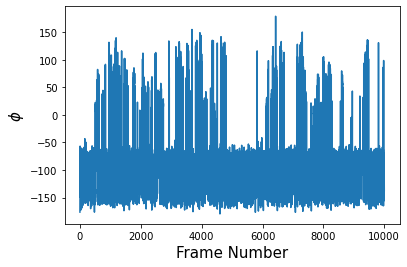

In [29]:
plt.plot(phi_traj)
plt.xlabel('Frame Number', fontsize = 15)
plt.ylabel(r'$\phi$', fontsize = 15)

#### Similarly, for $\psi$

In [30]:
psi_sel = u.select_atoms('index 6 or index 8 or index 14 or index 16')

psi_t = Dihedral([psi_sel]).run()
psi_traj = psi_t.angles.flatten()

/home/shaunak/work/software/miniconda3/envs/MDAnalysis_Tut/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:337: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, '$\\psi$')

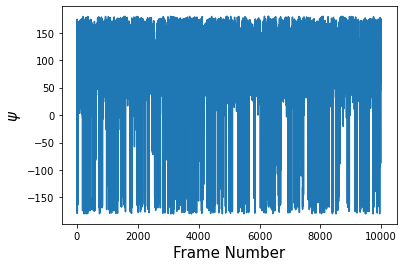

In [31]:
plt.plot(psi_traj)
plt.xlabel('Frame Number', fontsize = 15)
plt.ylabel(r'$\psi$', fontsize = 15)

Text(0.5, 1.0, 'Scatter plot of $\\phi$ and $\\psi$')

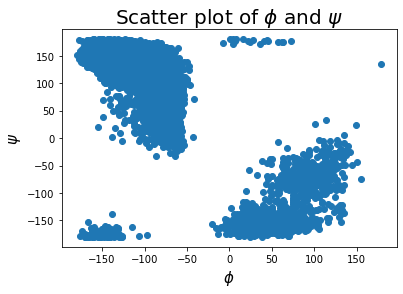

In [32]:
plt.scatter(phi_traj, psi_traj)
plt.xlabel(r'$\phi$', fontsize = 15)
plt.ylabel(r'$\psi$', fontsize = 15)
plt.title('Scatter plot of $\phi$ and $\psi$', fontsize = 20)

### For something simpler, like distance between the first and the last atom, we can simply loop through the trajectory

In [33]:
distances = []

for ts in u.trajectory:
    pos = u.atoms.positions
    required_distance = np.linalg.norm(pos[0] - pos[-1])
    distances.append(required_distance)

Text(0, 0.5, '$|{\\bf r}_0 - {\\bf r}_{N - 1}| (\\AA)$')

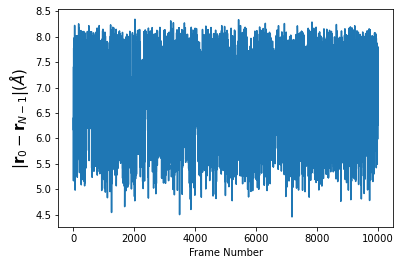

In [34]:
plt.plot(distances)
plt.xlabel('Frame Number')
plt.ylabel(r'$|{\bf r}_0 - {\bf r}_{N - 1}| (\AA)$', fontsize = 15)

### More possibilities : 
* Using this data, combined with `sum_hills` functionality of `plumed`, to create a 1D / 2D free energy surface from an NVT / NPT trajectory.
* Calculating RMSD w.r.t a reference structure (slightly complex, using MDAnalysis).